In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import verde as vd

In [2]:
data = vd.datasets.fetch_rio_magnetic_anomaly()

trend = vd.Trend(degree=2)
trend.fit(data.longitude, data.latitude, data.total_field_anomaly_nt)
data['trend'] = trend.predict(data.longitude, data.latitude)
data['residuals'] = trend.residuals_
print(trend)

Trend(damping=None, degree=2)


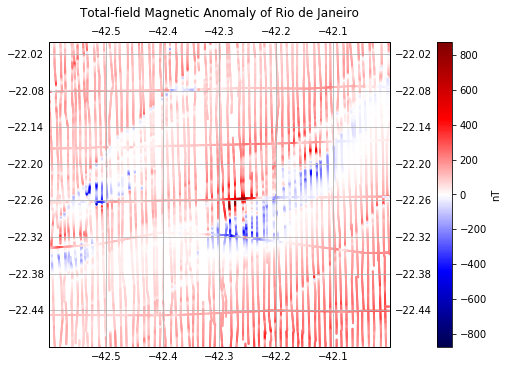

In [3]:
# Make a Mercator plot of the data using Cartopy
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_title('Total-field Magnetic Anomaly of Rio de Janeiro', pad=25)
# Since the data is diverging (going from negative to positive)
# we need to center our colorbar on 0. To do this, we calculate
# the maximum absolute value of the data to set vmin and vmax.
maxabs = np.max(np.abs([data.total_field_anomaly_nt.min(),
                        data.total_field_anomaly_nt.max()]))
# Cartopy requires setting the projection of the original data through the
# transform argument. Use PlateCarree for geographic data.
plt.scatter(data.longitude, data.latitude, c=data.total_field_anomaly_nt,
            s=1, cmap='seismic', vmin=-maxabs, vmax=maxabs,
            transform=ccrs.PlateCarree())
cb = plt.colorbar(pad=0.1)
cb.set_label('nT')
ax.gridlines(draw_labels=True)
# Set the extent of the plot to the limits of the data
ax.set_extent(vd.get_region(data.longitude, data.latitude))
plt.tight_layout()
plt.show()

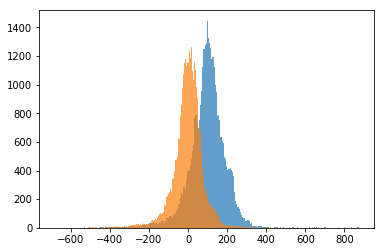

In [4]:
_ = plt.hist(data.total_field_anomaly_nt, bins='auto', alpha=0.7)
_ = plt.hist(trend.residuals_, bins='auto', alpha=0.7)


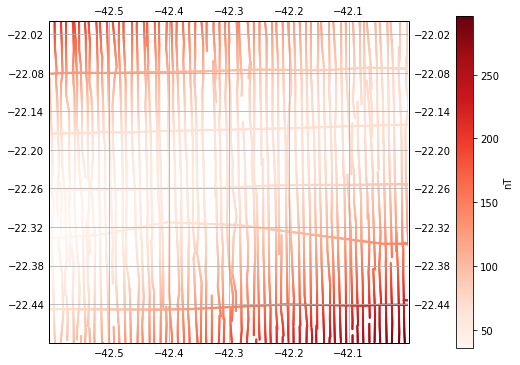

In [5]:
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator())
plt.scatter(data.longitude, data.latitude, c=data.trend,
            s=1, cmap='Reds', 
            transform=ccrs.PlateCarree())
cb = plt.colorbar(pad=0.1)
cb.set_label('nT')
ax.gridlines(draw_labels=True)
ax.set_extent(vd.get_region(data.longitude, data.latitude))
plt.tight_layout()
plt.show()

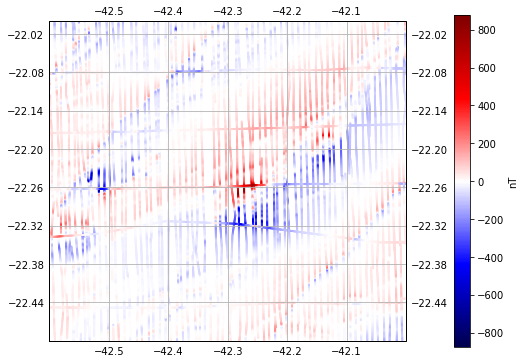

In [6]:
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator())
#maxabs = np.max(np.abs([data.residual.min(),
#                        data.residual.max()]))
plt.scatter(data.longitude, data.latitude, c=data.residuals,
            s=1, cmap='seismic', vmin=-maxabs, vmax=maxabs,
            transform=ccrs.PlateCarree())
cb = plt.colorbar(pad=0.1)
cb.set_label('nT')
ax.gridlines(draw_labels=True)
ax.set_extent(vd.get_region(data.longitude, data.latitude))
plt.tight_layout()
plt.show()